In [1]:
import numpy as np
import csv
def switch(apple):
    if type(apple) != str:
        if apple < 305:year = 2016;apple+=61
        elif apple< 670:year = 2017;apple+=61
        else:year = 2018;apple+=61
        apple%=365
        if apple == 0:month = 12;day = 31
        elif apple <= 31:month = 1;day = apple
        elif apple <= 59:month = 2;day = apple-31
        elif apple <= 90:month = 3;day = apple-59
        elif apple <= 120:month = 4;day = apple - 90
        elif apple <= 151:month = 5;day = apple - 120
        elif apple <= 181:month = 6;day = apple - 151
        elif apple <= 212:month = 7;day = apple - 181
        elif apple <= 243:month = 8;day = apple - 212
        elif apple <= 273:month = 9;day = apple - 243
        elif apple <= 304:month = 10;day = apple - 273
        elif apple <= 334:month = 11;day = apple - 304
        elif apple <= 365:month = 12;day = apple - 334
        return '%d/%d/%d'%(year,month,day)
        
    elif type(apple) == str:
        a = apple.split('/')
        year = int(a[0])
        month = int(a[1])
        day = int(a[2])
        number = 0
        if month <= 2:number+=(month-1)*31+day   
        elif month <= 7:
            if month%2 == 1:number+=59+day+(month-3)*30.5
            elif month%2 == 0:number+=90+day+(month-4)*30.5
        else:
            if month%2 == 0:number+=212+day+(month-8)*30.5
            elif month%2 == 1:number+=243+day+(month-9)*30.5
        if year == 2016:number-=61
        elif year == 2017:number+=304
        elif year == 2018:number+=669
        return number 

读取csv格式：具体日期、温度、湿度、辐射、降雨、功率

写入csv格式：日期（数字）、月份、时刻、温度、湿度、辐射、降雨、功率

In [2]:
READ_FILE = 'D:/datasets/solar/new_data/11-Site_4-.csv'
NEW_FILE = 'D:/datasets/solar/new_data/new_data.csv'
NEW_FILE2 = 'D:/datasets/solar/new_data/new_data2.csv'
NEW_FILE3 = 'D:/datasets/solar/new_data/new_data3.csv'
NEW_FILE4 = 'D:/datasets/solar/new_data/new_data4.csv'
SOURCE = 'D:/datasets/solar/new_data/source.csv'
time_list = []
for i in range(21):
    if i%2 == 0:
        time_list.append('%d:00'%(8+i/2))
    else:
        time_list.append('%d:30'%(8+i/2-0.5))
print(time_list)

['8:00', '8:30', '9:00', '9:30', '10:00', '10:30', '11:00', '11:30', '12:00', '12:30', '13:00', '13:30', '14:00', '14:30', '15:00', '15:30', '16:00', '16:30', '17:00', '17:30', '18:00']


## 寻找缺失的时间点和日期

In [3]:
#读取csv文件
reader = csv.reader(open(SOURCE,'r'), skipinitialspace = True)
# 跳过第一行
next(reader)
i = 0
time = [i*0.5 for i in range(16,37)]
for row in reader:
    if i == 21:
        i = 0
    if float(row[2]) == float(time[i]):
        i+=1
    else:
        print('缺失时间点',switch(int(row[0])),' ',row[0],row[2])
        for j in range(21):
            if float(time[j]) == float(row[2]):
                i=j
                i+=1
                break

In [5]:
reader = csv.reader(open(NEW_FILE4,'r'), skipinitialspace = True)
next(reader)
i=1.
for row in reader:
     if float(row[0]) != i:
            i+=1.
            if float(row[0]) != i and float(row[0]) == i+1:
                print('缺失日期：',i)
                i+=1
            elif float(row[0]) != i:
                for j in range(int(i),int(i+30)):
                    if j==float(row[0]):
                        print('缺失日期：',i,'到',j-1)
                        i=j
                        break

缺失日期： 12.0 到 15
缺失日期： 28.0 到 30
缺失日期： 33.0 到 37
缺失日期： 58.0
缺失日期： 60.0
缺失日期： 64.0 到 68
缺失日期： 77.0 到 80
缺失日期： 82.0
缺失日期： 89.0
缺失日期： 92.0
缺失日期： 108.0 到 125
缺失日期： 127.0
缺失日期： 133.0
缺失日期： 172.0
缺失日期： 174.0
缺失日期： 180.0 到 181
缺失日期： 183.0
缺失日期： 195.0 到 196
缺失日期： 199.0
缺失日期： 201.0
缺失日期： 206.0
缺失日期： 210.0
缺失日期： 233.0
缺失日期： 254.0
缺失日期： 277.0 到 279
缺失日期： 281.0
缺失日期： 287.0
缺失日期： 294.0 到 300
缺失日期： 309.0
缺失日期： 315.0
缺失日期： 318.0 到 319
缺失日期： 326.0
缺失日期： 328.0 到 329
缺失日期： 337.0
缺失日期： 344.0
缺失日期： 411.0 到 412
缺失日期： 475.0
缺失日期： 480.0 到 483
缺失日期： 494.0 到 497
缺失日期： 552.0
缺失日期： 577.0 到 578
缺失日期： 583.0
缺失日期： 604.0
缺失日期： 615.0
缺失日期： 619.0 到 621
缺失日期： 628.0
缺失日期： 634.0 到 635
缺失日期： 637.0
缺失日期： 639.0
缺失日期： 649.0 到 650
缺失日期： 663.0
缺失日期： 674.0
缺失日期： 676.0
缺失日期： 681.0 到 682
缺失日期： 688.0
缺失日期： 701.0
缺失日期： 715.0
缺失日期： 719.0
缺失日期： 723.0
缺失日期： 727.0
缺失日期： 736.0 到 738
缺失日期： 746.0 到 748
缺失日期： 770.0
缺失日期： 785.0
缺失日期： 857.0 到 859
缺失日期： 883.0
缺失日期： 933.0


## 缺失数据

In [25]:
reader = csv.reader(open(SOURCE,'r'), skipinitialspace = True)
next(reader)
# 日期、月份、时刻、温度、湿度、辐射、降雨、漫反射、功率
for row in reader:
    if row[-1] == '' or row[-2] == '' or row[3] == '' or row[4] == ''or row[5] == '':
        print(switch(int(row[0])),row[0],row[2],'缺失数据')

## 相关系数和散点图

In [7]:
import matplotlib.pyplot as plt
#月份、时刻、温度、湿度、辐射、功率
month,timepoint,temperature,humidity,radiation,power = np.loadtxt(NEW_FILE2,delimiter=',',skiprows=1,usecols=(1,2,3,4,5,7),unpack=True)
print('共有%d天数据，共%d条'%(len(power)/21,len(power)))
print('平均功率辐射比为：',np.mean(power/radiation))
print('方差：',np.var(power/radiation))
print('最大值：',np.max(power/radiation))

共有894天数据，共18774条
平均功率辐射比为： 0.36370310858718363
方差： 0.19780652641799995
最大值： 15.761067751383122


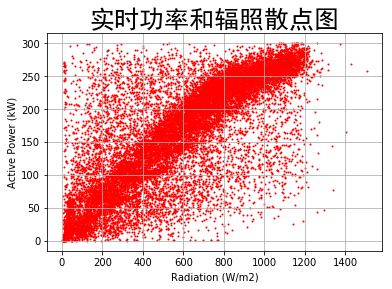

In [113]:
plt.scatter(radiation,power, s=1, c='r')
plt.xlabel('Radiation (W/m2)')
plt.ylabel('Active Power (kW)')
plt.title('实时功率和辐照散点图', fontproperties = 'SimHei',fontsize = 25)
plt.grid(True)
plt.show()

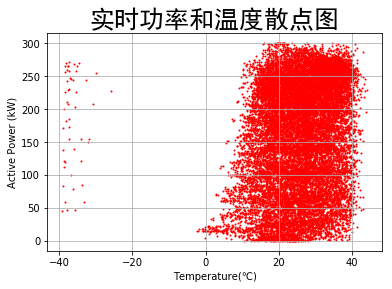

In [9]:
plt.scatter(temperature, power,s=1,c='r')
plt.ylabel('Active Power (kW)')
plt.xlabel('Temperature(℃)')
plt.title('实时功率和温度散点图', fontproperties = 'SimHei',fontsize = 25)
plt.grid(True)
plt.show()

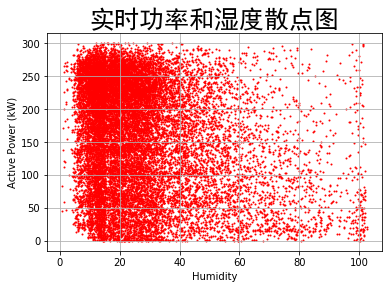

In [115]:
plt.scatter(humidity, power,s=1,c='r')
plt.ylabel('Active Power (kW)')
plt.xlabel('Humidity')
plt.title('实时功率和湿度散点图', fontproperties = 'SimHei',fontsize = 25)
plt.grid(True)
plt.show()

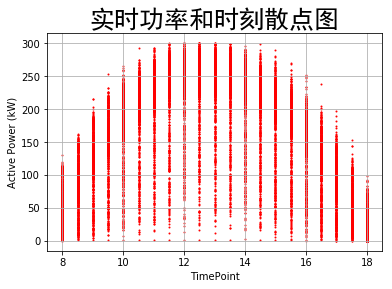

In [116]:
plt.scatter(timepoint, power,s=1,c='r')
plt.ylabel('Active Power (kW)')
plt.xlabel('TimePoint')
plt.title('实时功率和时刻散点图', fontproperties = 'SimHei',fontsize = 25)
plt.grid(True)
plt.show()

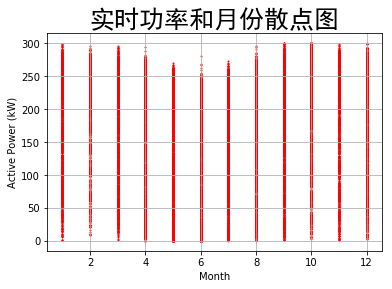

In [118]:
plt.scatter(month, power,s=1,c='r')
plt.ylabel('Active Power (kW)')
plt.xlabel('Month')
plt.title('实时功率和月份散点图', fontproperties = 'SimHei',fontsize = 25)
plt.grid(True)
plt.show()

In [7]:
corr_power_iradition = np.corrcoef(power,radiation)
corr_power_time = np.corrcoef(power,timepoint)
corr_power_temperature = np.corrcoef(power,temperature)
corr_power_humidity = np.corrcoef(power,humidity)
corr_power_month = np.corrcoef(power,month)
print('功率、辐照相关系数',corr_power_iradition[0,1])
print('功率、温度相关系数',corr_power_temperature[0,1])
print('功率、湿度相关系数',corr_power_humidity[0,1])
print('功率、时间相关系数',corr_power_time[0,1])
print('功率、月份相关系数',corr_power_month[0,1])

功率、辐照相关系数 0.7834043693367297
功率、温度相关系数 0.21358122940213226
功率、湿度相关系数 -0.2366730357576097
功率、时间相关系数 -0.14364296581694924
功率、月份相关系数 0.016116100981512973


## 调整月份和时刻标记后的相关系数

In [4]:
#月份、时刻、温度、湿度、辐射、功率
data = np.loadtxt(NEW_FILE4,delimiter=',',skiprows=1,usecols=(1,2,3,4,5,7))
month = [[],[],[],[],[],[],[],[],[],[],[],[]]
time = [[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]
season = [[],[],[],[]]
for row in data:
    month[int(row[0])-1].append(row[-1])
    time[int((float(row[1])-8)/0.5)].append(row[-1])
    if int(row[0]) in [9,10,11]:
        season[0].append(row[-1])
    elif int(row[0]) in [12,1,2]:
        season[1].append(row[-1])
    elif int(row[0]) in [3,4,5]:
        season[2].append(row[-1])
    else:
        season[3].append(row[-1])
for i in range(1,13):
    print('%d 月：'%i,np.mean(month[i-1]))
print('-------')
for i in range(21):
    print(8+i*0.5,':',np.mean(time[i]))
for i in range(4):
    if i == 0:
        print('春',np.mean(season[0]))
    elif i == 1:
        print('夏',np.mean(season[1]))
    elif i == 2:
        print('秋',np.mean(season[2]))
    else:
        print('冬',np.mean(season[3]))

1 月： 174.9923997981555
2 月： 188.75596842877164
3 月： 172.9214636192562
4 月： 162.4517845510844
5 月： 146.98924002097706
6 月： 134.85499613576997
7 月： 147.61370317133094
8 月： 168.07349245652216
9 月： 174.84608045909522
10 月： 182.2971786968262
11 月： 174.6827024253688
12 月： 174.05737550680539
-------
8.0 : 51.09553042392488
8.5 : 89.35148544951107
9.0 : 125.52548437217241
9.5 : 154.8750412092734
10.0 : 181.36673694137932
10.5 : 202.58289519939657
11.0 : 219.23082396108373
11.5 : 231.65456034604682
12.0 : 239.48137228263545
12.5 : 240.80861128823892
13.0 : 241.5426493630296
13.5 : 236.69191709895318
14.0 : 226.4226555055049
14.5 : 211.09124590070198
15.0 : 196.70230527784483
15.5 : 175.28761827027097
16.0 : 151.3803322885813
16.5 : 121.95483778512562
17.0 : 91.2596528968165
17.5 : 54.90937300758128
18.0 : 24.679197636279554
春 177.14311509021465
夏 179.37714803078111
秋 160.67202948600857
冬 151.37249837121328


In [5]:
for i in range(len(data)):
    if data[i][1] == 1:data[i][1] = 17.938
    elif data[i][1] == 2:data[i][1] = 17.938
    elif data[i][1] == 3:data[i][1] = 16.067
    elif data[i][1] == 4:data[i][1] = 16.067
    elif data[i][1] == 5:data[i][1] = 16.067
    elif data[i][1] == 6:data[i][1] = 15.137
    elif data[i][1] == 7:data[i][1] = 15.137
    elif data[i][1] == 8:data[i][1] = 15.137
    elif data[i][1] == 9:data[i][1] = 17.714
    elif data[i][1] == 10:data[i][1] = 17.714
    elif data[i][1] == 11:data[i][1] = 17.714
    elif data[i][1] == 12:data[i][1] = 17.938
    
    if data[i][2] == 8.0:data[i][2] = 5.1096
    elif data[i][2] == 8.5:data[i][2] = 8.9351
    elif data[i][2] == 9.0:data[i][2] = 12.5525
    elif data[i][2] == 9.5:data[i][2] = 15.4875
    elif data[i][2] == 10.0:data[i][2] = 18.1367
    elif data[i][2] == 10.5:data[i][2] = 20.2583
    elif data[i][2] == 11.0:data[i][2] = 21.9231
    elif data[i][2] == 11.5:data[i][2] = 23.1655
    elif data[i][2] == 12.0:data[i][2] = 23.9481
    elif data[i][2] == 12.5:data[i][2] = 24.0809
    elif data[i][2] == 13.0:data[i][2] = 24.1543
    elif data[i][2] == 13.5:data[i][2] = 23.6692
    elif data[i][2] == 14.0:data[i][2] = 22.6423
    elif data[i][2] == 14.5:data[i][2] = 21.1091
    elif data[i][2] == 15.0:data[i][2] = 19.6702
    elif data[i][2] == 15.5:data[i][2] = 17.5288
    elif data[i][2] == 16.0:data[i][2] = 15.1380
    elif data[i][2] == 16.5:data[i][2] = 12.1955
    elif data[i][2] == 17.0:data[i][2] = 9.1260
    elif data[i][2] == 17.5:data[i][2] = 5.4909
    elif data[i][2] == 18.0:data[i][2] = 2.4679
corr_power_iradition = np.corrcoef(data[:,-1],data[:,-2])
corr_power_time = np.corrcoef(data[:,-1],data[:,1])
corr_power_temperature = np.corrcoef(data[:,-1],data[:,2])
corr_power_humidity = np.corrcoef(data[:,-1],data[:,3])
corr_power_month = np.corrcoef(data[:,-1],data[:,0])
print('功率、辐照相关系数',corr_power_iradition[0,1])
print('功率、温度相关系数',corr_power_temperature[0,1])
print('功率、湿度相关系数',corr_power_humidity[0,1])
print('功率、时间相关系数',corr_power_time[0,1])
print('功率、月份相关系数',corr_power_month[0,1])

功率、辐照相关系数 0.8182669725154265
功率、温度相关系数 0.20942589050752405
功率、湿度相关系数 -0.21915235143174897
功率、时间相关系数 -0.21163460842033135
功率、月份相关系数 0.016997533870493468
